## DBSCAN(Density Based Spatial Clustering of Applications with Noise)

### DBSCAN 실습 - 붓꽃 데이터 세트

In [99]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris= load_iris()

In [4]:
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

iris_df['target']= iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# DBSCAN으로 군집화
dbscan = DBSCAN(eps=0.6      # 입실론 반경
            , min_samples=8   #  입실론 주변영역 내에 포함될 최소 데이터 개수
            , metric='euclidean' # 거리를 구하는 방식지정: 유클리디안
               )
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_labels'] = dbscan_labels

In [12]:
iris_df.rename(columns={'dbscan_labels':'dbscan_cluster'}, inplace=True)

In [13]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [15]:
iris_result =iris_df.groupby('target')['dbscan_cluster'].value_counts()
iris_result

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

- DBSCAN에 의해서 0, 1 두가지 레이블 군집으로 나뉨 (잘되지 않았음)
- 군집 레이블이 -1 인것은 노이즈에 속하는 군집을 의미

In [17]:
np.unique(dbscan_labels, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([13, 49, 88], dtype=int64))

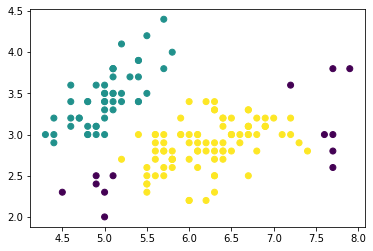

In [25]:
# 기본 시각화 (sepal_length, sepal_width 두개의 컬럼만 가지고.)
plt.scatter(x=iris_df['sepal_length'], y=iris_df['sepal_width'], c = iris_df['dbscan_cluster'])

- 보라색은 노이즈이고, 2개의 그룹으로 군집화됨

In [115]:
# 시각화 함수
# 클러스터링 결과를 담은 DataFrame과 클러스터 모델을 인자로 받음
# 클러스터링 결과를 시각화

# clusterobj : fitting 완료된 군집 모델 객체
# label_name : ex) kmeans_cluster, gmm_cluster
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_   # 군집 레이블 중심좌표 for Centroid 계열(KMeans, Mean Shift)
    
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers = ['o','s','^','x','*']   # 5개의 중심점까지 군집화 시각화
    
    isNoise = False
    
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label== -1:    # label = -1 : 잡음(군집대상에서 빠진 아이, DBSCAN에서 사용하기 위해 미리 만들어둠)
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = 'Cluster' +str(label) # 범례에 표시할 문자열
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2']
                   , s=70, edgecolors='k', marker=markers[label], label = cluster_legend
                   )   # 하드코딩되어있어서 좋은 코드는 아니다.
        
        # 중심좌표 출력 코드 추가하기 
        if iscenter:
                plt.scatter(x=centers[label][0], y=centers[label][1], color='white'
                , s=500   # 크기
                , alpha=0.6   # 투명도(0~1 사이)
                ,edgecolors='k'  # 중심좌표 색깔 검은색으로
                ,marker= markers[label])     # %label로 숫자값 들어가도록 지정하기
    
            # 중심 좌표 레이블(0,1,2) 시각화
                plt.scatter(
                 x=centers[label][0]
                ,y=centers[label][1]
                ,color='k'
                , s=100
                ,edgecolors='k'  # 중심좌표 색깔 검은색으로
                ,marker= '$%d$' % label     # %label로 숫자값 들어가도록 지정하기
                )   

        
        
    if isNoise:
        legend_loc = 'upper center'  # 범례위치
    else : 
        legend_loc = 'upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()
            

In [101]:
# 위 함수를 이용하기 위해 피처를 두개로 축소하기('ftr1, ftr2'로 하드코딩되어있으므로, 또한 scatter 로 직관적으로 볼수있게 차원축소)
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [27]:
iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

In [29]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


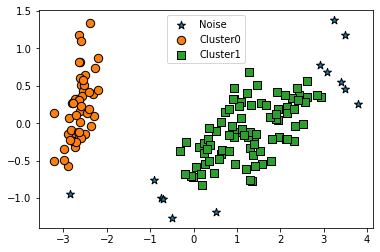

In [35]:
# 함수를 이용해 시각화
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

In [57]:
# 하이퍼 파라미터 조정
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.8  # 위에서는 0.6
    , min_samples=4
    ,metric='euclidean'
)
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster2'] = dbscan_labels

In [58]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2,dbscan_cluster2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,1.944110,0.187532,1
146,6.3,2.5,5.0,1.9,2,1,1.527167,-0.375317,1
147,6.5,3.0,5.2,2.0,2,1,1.764346,0.078859,1
148,6.2,3.4,5.4,2.3,2,1,1.900942,0.116628,1


In [59]:
iris_result = iris_df.groupby('target')['dbscan_cluster2'].value_counts()
iris_result

target  dbscan_cluster2
0        0                 50
1        1                 50
2        1                 48
        -1                  2
Name: dbscan_cluster2, dtype: int64

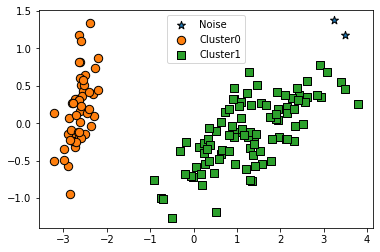

In [60]:
# 함수를 이용해 시각화
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster2', iscenter=False)

- Noise 가 좀 줄었다. eps(입실론 반경)을 0.6에서 0.8로 좀 키웠으니 상대적으로 밀도가 작아도 군집데이터에 포함되었다

- 그러나 기본적으로 iris 데이터 셋은 dbscan 하기 적합한 데이터가 아니다

### DBSCAN 실습2  - make_circles() 데이터 세트

In [102]:
from sklearn.datasets import make_circles

In [103]:
# 임의에 서클 데이터 생성
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05 , random_state=0, factor=0.5) # factor: 반반 나누기50%

In [104]:
cluster_df = pd.DataFrame(
    data=X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

In [105]:
cluster_df.head()

,ftr1,ftr2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


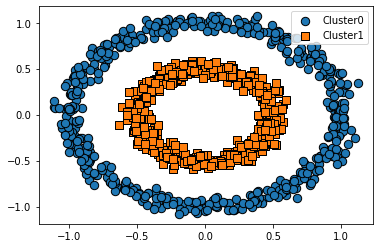

In [106]:
# 임의 생성된 데이터만 시각화하여 확인하기 위해 시각화 함수 사용
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

In [107]:
# KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_labels

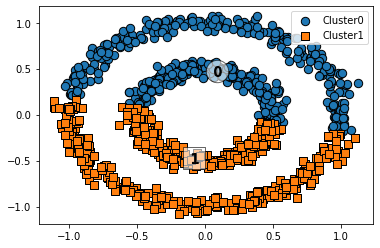

In [116]:
visualize_cluster_plot(kmeans, cluster_df, 'kmeans_cluster')

In [94]:
from sklearn.mixture import GaussianMixture

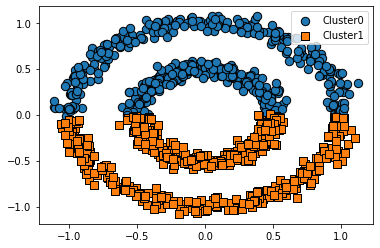

In [96]:
# GMM
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)
cluster_df['gmm_cluster'] = gmm_labels
visualize_cluster_plot(gmm, cluster_df, 'gmm_cluster', iscenter=False)

- Kmeans도, GMM 도 위 서클 데이터 세트를 제대로 군집화하지 못했다

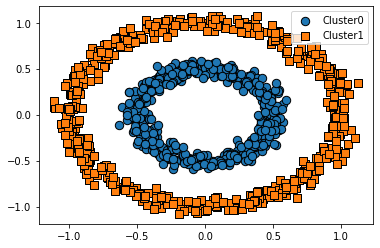

In [97]:
# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, cluster_df, 'dbscan_cluster', iscenter=False)

- DBSCAN은 밀도 중심으로 군집화하기 때문에 위와 같은 서클 형태의 데이터도 잘 군집화할수 있다

- 사람의 얼굴 인식 등에 응용될 수 있는 기술